### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Dependent variable:** Congruent words and incongruent words.

**Independent variable:** Time to finish the task.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Ho (Null Hypothesis):** no difference in time between two reading the tasks (congruent group and the incongruent group).

**H1 (Alternative Hypothesis):** congruent group task take different time from incongruent group.

H0: μc = μi

H1: μc ≠ μi

where μ is the population mean

The dependent variable is continuous and Independent variable consists of two categorical. The sample size is smaller than 30 and  the population standard deviations unknown. So i will use statistical test dependent t-test (two tailed). We are assuming distributions are nearly normal and we compare the two means of related groups .

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm

#import the dataset
df = pd.read_csv('stroopdata.csv')
df.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [62]:
c_mean = df['Congruent'].mean()
i_mean = df['Incongruent'].mean()
c_mean , i_mean

(14.051124999999999, 22.015916666666666)

In [4]:
c_std = df['Congruent'].std()
i_std = df['Incongruent'].std()
c_std , i_std

(3.5593579576451955, 4.7970571224691376)

Mean of the time to read for the Congruent group:  14.051124999999999

Mean of the time to read for the Incongruent group:  22.015916666666666

Standard deviation of the time to read for the Congruent group:  3.5593579576451955

Standard deviation of the time to read for the Incongruent group:  4.7970571224691376

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

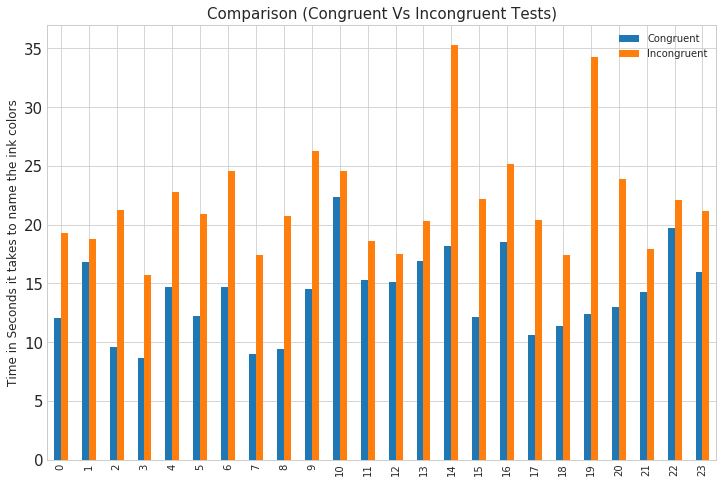

In [53]:
# Build the visualizations here
df.plot(x=df.index, y=["Congruent", "Incongruent"], kind="bar",figsize=(12,8))
plt.title('Comparison (Congruent Vs Incongruent Tests)', fontsize=15);
plt.ylabel('Time in Seconds it takes to name the ink colors', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.legend(prop={'size':10})

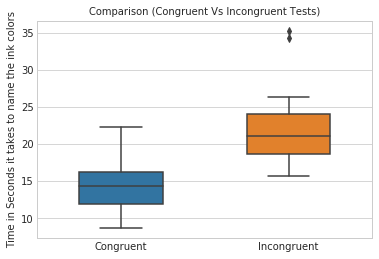

In [51]:
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(data=df[['Congruent', 'Incongruent']], width=0.5);
plt.title('Comparison (Congruent Vs Incongruent Tests)', fontsize=10);
plt.ylabel("Time in Seconds it takes to name the ink colors", fontsize=10);

**Ans.** As shown in the both graphics,  clearly displays the difference between of the two group data. The particpants took longer time it takes to name the ink colors of the incongruent words than the congruent words.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

We will conduct two tailed t-test, so find the critical value of t at 95% confidance level and we need have a 5% chance of being wrong.

In [64]:
# Perform the statistical test here
import math
sample_size = len(df)
sample_size

24

Degree Of Freedom(df) = sample_size - 1 = 23

t-critical = ∓2.069  [1]

In [60]:
#find the diffenence of each data
df['Difference'] = df['Congruent'] - df['Incongruent']
#Calculate the Standard Deviation
s = df['Difference'].std()
s

4.8648269103590556

In [68]:
#calculate the t-statistic
t = (c_mean - i_mean)/(s/math.sqrt(sample_size))
t

-8.020706944109957

t-statistic > t-critical

8.0207 > 2.069

Our t-statistic is greater than our critical value, So we reject the null hypothesis which states no difference in time between two reading the tasks (congruent group and the incongruent group). Congruent group task take less time from incongruent group.

### References

1. https://goodcalculators.com/student-t-value-calculator/
2. https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f